* **Student**: Minhchau Dang
* **Email Address**: minhchau.dang@berkeley.edu
* **Course**: 2016-0111 DATASCI W261: Machine Learning at Scale
* **Section**: Spring 2016, Section 2
* **Assignment**: Homework 0, Week 0
* **Submission Date**: Month 0, 2016

This notebook requires some nbextensions.

* [toc2](https://github.com/ipython-contrib/IPython-notebook-extensions/tree/master/nbextensions/usability/toc2) provides a button to create a floating table of contents
* [toggle_all_line_numbers](https://github.com/ipython-contrib/IPython-notebook-extensions/tree/master/nbextensions/usability/toggle_all_line_numbers) provides a button to see line numbers for all code cells
* [autosaveclasses](https://github.com/holatuwol/jupyter-magic/tree/master/nbextensions/autosaveclasses.js) avoids usage of `%%writefile` (cells with a class definition are saved to disk when run)

If they are not yet installed, run the following cell and restart the notebook server.

In [ ]:
%%bash
IPYTHON_PROFILE_HOME=$(ipython locate)

nbextdl() {
    if [ ! -f $IPYTHON_PROFILE_HOME/nbextensions/$2/$3 ]; then
        mkdir -p $IPYTHON_PROFILE_HOME/nbextensions/$2
        curl --silent -L \
            "https://raw.githubusercontent.com/$1/master/nbextensions/$2/$3" \
            > "$IPYTHON_PROFILE_HOME/nbextensions/$2/$3"
    fi
}

nbextdl ipython-contrib/IPython-notebook-extensions usability/toc2 main.js
nbextdl ipython-contrib/IPython-notebook-extensions usability/toc2 main.css
nbextdl ipython-contrib/IPython-notebook-extensions usability/toc2 icon.png
nbextdl ipython-contrib/IPython-notebook-extensions usability/toc2 image.png

nbextdl ipython-contrib/IPython-notebook-extensions usability/toggle_all_line_numbers main.js
nbextdl ipython-contrib/IPython-notebook-extensions usability/toggle_all_line_numbers icon.png

nbextdl holatuwol/jupyter-magic . autosaveclasses.js

Autoload the extensions.

In [ ]:
%%javascript
require(['base/js/utils'], function(utils) {
    utils.load_extensions('usability/toc2/main');
    utils.load_extensions('usability/toggle_all_line_numbers/main');
    utils.load_extensions('autosaveclasses');
});

<IPython.core.display.Javascript object>

# HW 6.0

> In mathematics, computer science, economics, or management science what is mathematical optimization?

Mathematical optimization is the process of selecting the "best" value for a set of *decision variables* with respect to the value of some *objective function*.

In our case, we are maximizing or minimizing an objective function, such as minimizing the mean squared error to find the best parameters for linear regression.

> Give an example of a optimization problem that you have worked with directly or that your organization has worked on. Please describe the objective function and the decision variables.

At a previous job, an optimization project that we worked on was to find the best way to word promotional banners on an e-commerce website. The objective "function" was how much revenue the promotion drove, and the decision variable was the wording of the headline on the promo banner.

> Was the project successful (deployed in the real world)? Describe.

In this case, the project was not 100% successful, as A/B testing can be difficult to get statistically significant results.  If we had unlimited time to run the A/B test, we may have been able to iterate on the wording of the promotion for optimization.

# HW 6.1 Optimization Theory

## Unconstrained univariate optimization

Let $f : \mathbb{R} \rightarrow \mathbb{R}$ in class $C^1$ and $C^2$ (its first derivative and second derivative are continuous functions). Let $\nabla f : \mathbb{R} \rightarrow \mathbb{R}$ be the gradient function (first derivative) and let $\nabla^2 f : \mathbb{R} \rightarrow \mathbb{R}$ be the gradient of the gradient function (second derivative).

If there is a value $x_0$ for the decision variable satisfying the condition that there exists a neighborhood $\mathcal{N}$ consisting of the points within $\epsilon > 0$ of $x_0$ for which $\forall x \in \mathcal{N}: f(x_0) < f(x)$, then we define that as a *local minimum* of $f$. If there is a value $x_0$ for the decision variable satisfying the condition that there exists a neighborhood $\mathcal{N}$ consisting of the points within $\epsilon > 0$ of $x_0$ for which $\forall x \in \mathcal{N}: f(x_0) > f(x)$, then we define that as a *local maximum* of $f$.

Define a local extrema as a point that is either a local minimum or a local maximum.

> For unconstrained univariate optimization what are the first order Necessary Conditions for Optimality (FOC)? Give a mathematical definition.

Let $x_0$ be a local extrema. $x_0$ occurs when the first derivative of $f$ evaluated at $x_0$ is zero ($\nabla f(x_0) = 0$).

>  What are the second order optimality conditions (SOC)? Give a mathematical defintion.

Let $x_0$ be a local extrema. $x_0$ is a local minimum if the second derivative of $f$ evaluated at $x_0$ is positive ($\nabla^2 f(x_0) > 0$), and a local maximum of $f$ if the second derivative at $f$ evaluated at $x_0$ is negative ($\nabla^2 f(x_0) < 0$).

> Also in python, plot the univariate function $x^3 -12x^2-6$ defined over the real domain -6 to +6. Also plot its corresponding first and second derivative functions. Eyeballing these graphs, identify candidate optimal points and then classify them as local minimums or maximums. Highlight and label these points in your graphs.

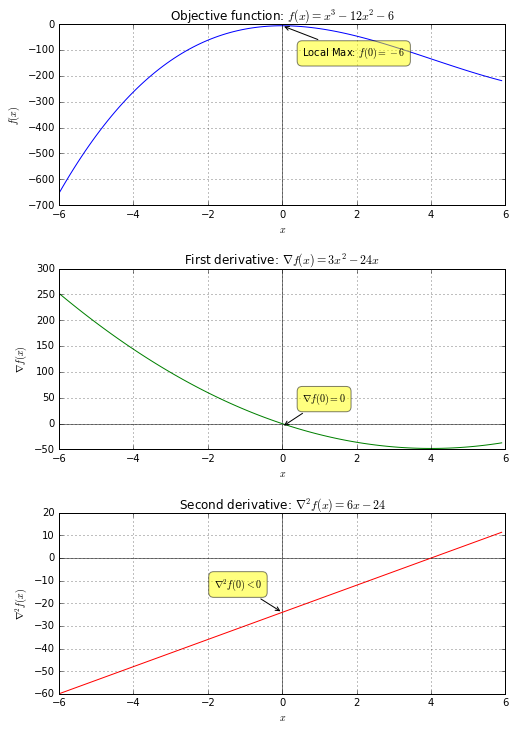

In [ ]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

def plot_61():
    x = np.arange(-6, 6, 0.1)
    y = x ** 3 - 12 * x ** 2 - 6
    y_prime = 3 * x ** 2 - 24 * x
    y_2prime = 6 * x - 24

    plt.figure(figsize=(8,12))
    plt.subplots_adjust(hspace=0.35)

    plt.axhline(y=0, color='k')

    # Plot the objective function

    plt.subplot(3, 1, 1)
    plt.grid(True)
    plt.axhline(0, color='grey')
    plt.axvline(0, color='grey')
    plt.plot(x, y)
    plt.ylabel(r"$f(x)$")
    plt.xlabel(r"$x$")
    plt.title(r"Objective function: $f(x)=x^3-12x^2-6$")
    plt.annotate(r'Local Max: $f(0)=-6$',
        xy = (0, -6), xytext = (20, -20),
        textcoords = 'offset points', ha = 'left', va = 'top',
        bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))

    # Plot the first derivative function

    plt.subplot(3, 1, 2)
    plt.grid(True)
    plt.axhline(0, color='grey')
    plt.axvline(0, color='grey')
    plt.plot(x, y_prime, color='green')
    plt.ylabel(r"$\nabla f(x)$")
    plt.xlabel(r"$x$")
    plt.title(r"First derivative: $\nabla f(x)=3x^2-24x$")
    plt.annotate(r'$\nabla f(0)=0$',
        xy = (0, -6), xytext = (20, 20),
        textcoords = 'offset points', ha = 'left', va = 'bottom',
        bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))

    # Plot the second derivative

    plt.subplot(3, 1, 3)
    plt.grid(True)
    plt.axhline(0, color='grey')
    plt.axvline(0, color='grey')
    plt.plot(x, y_2prime, color='red')
    plt.ylabel(r"$\nabla^2 f(x)$")
    plt.xlabel(r"$x$")
    plt.title(r"Second derivative: $\nabla^2 f(x)=6x-24$")
    plt.annotate(r'$\nabla^2 f(0)<0$',
        xy = (0, -24), xytext = (-20, 20),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))

plot_61()

> Justify your responses using the FOC and SOC.

The objective function evaluated at 0 $f(0) = -6$ is a local maximum of $f(x)$, as indicated by the first derivative evaluated at 0 $\nabla f(0) = 0$ (satisfying the first order condition), the second drivative evaluated at 0 $\nabla^2 f(x) < 0$ (satisfying the second order condition).

## Unconstrained multivariate optimization

Let $f : \mathbb{R}^n \rightarrow \mathbb{R}$ in class $C^1$ and $C^2$ (its first derivative and second derivative are continuous functions). Let $\nabla f : \mathbb{R}^n \rightarrow \mathbb{R}^n$ be the gradient function (first derivative) and let $\nabla^2 f : \mathbb{R}^n \rightarrow \mathbb{R}^{n \times n}$ be the gradient of the gradient function (second derivative).

> For unconstrained multi-variate optimization what are the first order Necessary Conditions for Optimality (FOC). Give a mathematical definition.

Let $\mathbf{x}_0$ be a local extrema. $\mathbf{x}_0$ occurs when the first derivative (Jacobian matrix) has all entries equal to zero, or $J(\mathbf{x}_0) = \mathbf{0}$.

> What are the second order optimality conditions (SOC)? > What is the Hessian matrix in this context? Give a mathematical definition. 

Let $\mathbf{x}_0$ be a local extrema. $\mathbf{x}_0$ is a local minimum if the second derivative (Hessian matrix) evaluated at that point has all entries non-negative (i.e., $H(\mathbf{x})$ is positive semidefinite), and a local maximum if the second derivative evaluated at that point has all entries non-positive (i.e., $H(\mathbf{x}$) is negative semidefinite).

# HW 6.2

> Taking $x=1$ as the first approximation ($x_1$) of a root of $x^3 + 2x -4 = 0$, use the Newton-Raphson method to calculate the second approximation (denoted as $x_2$) of this root. (Hint: the solution is $x_2 = 1.2$)

## Visual intuition

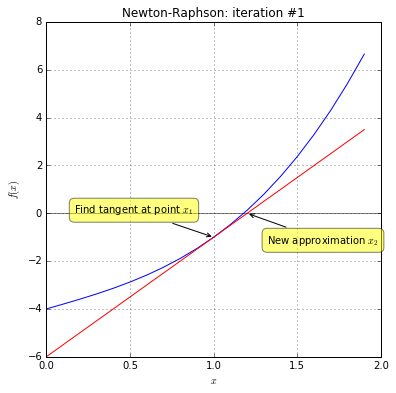

In [ ]:
%matplotlib inline

def plot_62():
    x = np.arange(0, 2, 0.1)
    y = x ** 3 + 2 * x - 4
    tangent = 5 * x - 6

    plt.figure(figsize=(6,6))

    plt.grid(True)
    plt.axhline(0, color='grey')
    plt.axvline(0, color='grey')
    plt.plot(x, y)
    plt.plot(x, tangent, color="red")
    plt.ylabel(r"$f(x)$")
    plt.xlabel(r"$x$")
    plt.title(r"Newton-Raphson: iteration #1")
    plt.annotate(r'Find tangent at point $x_1$',
        xy = (1,-1), xytext = (-20, 20),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))
    plt.annotate(r'New approximation $x_2$',
        xy = (1.2,0), xytext = (20, -20),
        textcoords = 'offset points', ha = 'left', va = 'top',
        bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))

plot_62()

## Computation process

Find value of $f(x)$ at $x_1$
$$
\begin{equation}
\begin{split}
f(x) & = x^3+2x-4 \\
f(1) & = (1)^3+2(1)-4 \\
f(1) & = -1 \\
\end{split}
\end{equation}
$$

Find value of $\nabla f(x)$ at $x_{1}$:
$$
\begin{equation}
\begin{split}
\nabla f(x) & = 3x^2+2 \\
\nabla f(1) & = 3(1)^2+2 \\
\nabla f(1) & = 5 \\
\end{split}
\end{equation}
$$

Define line with $m = \nabla f(x_1)$ containing point $(x_1, f(x_1))$:
$$
\begin{equation}
\begin{split}
f(x)-f(x_1) & = (\nabla f(x_1))(x-x_1) \\
f(x)-(-1) & = (5)(x-(1)) \\
f(x)+1 & = 5(x-1) \\
f(x) & = 5x - 6
\end{split}
\end{equation}
$$

Find $x_2$ when $f(x_2) = 0$, which is the $x$-intercept of that line:
$$
\begin{equation}
\begin{split}
f(x_2) &= 5x_2 - 6 \\
(0) &= 5x_2 - 6 \\
5x_2 &= 6 \\
x_2 &= 1.2
\end{split}
\end{equation}
$$

## Computation shortcut

To cross-check our answer, if we start with the assumption that we are always going to find the $x$-intercept, we can derive a simplified version of the Newton-Raphson approach:

\begin{equation}
\begin{split}
f(x_2)-f(x_1) & = (\nabla f(x_1))(x_2-x_1) \\
(0)-f(x_1) & = (\nabla f(x_1))(x_2-x_1) \\
-f(x_1) & = (\nabla f(x_1))(x_2-x_1) \\
-\frac{f(x_1)}{\nabla f(x_1)} & = x_2-x_1 \\
x_2 & = x_1 - \frac{f(x_1)}{\nabla f(x_1)} \\
\end{split}
\end{equation}

Since we know $x_1 = 1$ and we've already computed $f(x_1) = -1$ and $\nabla f(x_1) = 5$:

\begin{equation}
\begin{split}
x_2 & = x_1 - \frac{f(x_1)}{\nabla f(x_1)} \\
x_2 & = (1) - \frac{(-1)}{(5)} \\
x_2 & = 1.2 \\
\end{split}
\end{equation}


# HW 6.3 Convex Optimization

> What makes an optimization problem convex?

An optimization problem is convex if the objective function we are minimizing is convex. In two dimensions, we can think of a convex function as follows:

- If we look at the function and a tangent line at a specific point, the function globally lies above the tangent line
- If this is true for all points, the function is globally convex

>  What are the first order Necessary Conditions for Optimality in convex optimization.

Let $\mathbf{x}_0$ be a global extrema. Just like in the general case of mathematical optimization, $\mathbf{x}_0$ occurs when the first derivative (Jacobian matrix) has all entries equal to zero, or $J(\mathbf{x}_0) = \mathbf{0}$.

> What are the second order optimality conditions for convex optimization?

In a convex function, the second derivative (Hessian matrix) evaluated at any point has all entries non-negative (i.e., $H(\mathbf{x})$ is positive semidefinite). Therefore, once we identify an extrema $\mathbf{x}_0$ from the first order condition, we know that $\mathbf{x}_0$ is a minimum.

> Are both necessary to determine the maximum or minimum of candidate optimal solutions?

If the objective function is convex, we only need the first order condition to know that an optimal solution is a minimum.

If the objective function is concave, the second derivative (Hessian matrix) evaluated at any point has all entries non-positive (i.e., $H(\mathbf{x})$ is negative semidefinite). In this case, once we identify an extrema $\mathbf{x}_0$ from the first order condition, we know that $\mathbf{x}_0$ is a global maximum.

> Fill in the BLANKS here: Convex minimization, a subfield of optimization, studies the problem of minimizing BLANK functions over BLANK sets. The BLANK property can make optimization in some sense "easier" than the general case - for example, any local minimum must be a global minimum.

All the BLANKS are filled in with **convex** (or some variant of that word). This results in the following quote from the Wikipedia article on convex optimization ([reference](https://en.wikipedia.org/wiki/Convex_optimization)):

Convex minimization, a subfield of optimization, studies the problem of minimizing **convex** functions over **convex** sets. The **convexity** property can make optimization in some sense "easier" than the general case - for example, any local minimum must be a global minimum.

# HW 6.4

> The learning objective function for weighted ordinary least squares (WOLS) (aka weight linear regression) is defined as follows:

> $$0.5 \sum_{i} (weight)_i \cdot (\mathbf{W} \cdot \mathbf{X}_i - y_i)^2$$

> Where training set consists of input variables $\mathbf{X}$ (in vector form) and a target variable $y$, and $\mathbf{X}$ is the vector of coefficients for the linear regression model.

> Derive the gradient for this weighted OLS by hand; showing each step and also explaining each step.

## WOLS closed form solution

We are given matrices of the following dimensions, when we have N observations with M variables:

$$
\mathbf{Y}=\begin{bmatrix}
y_1 \\
y_2 \\
\vdots \\
y_N
\end{bmatrix}
, \mathbf{X}=\begin{bmatrix}
x_{11} & x_{12} & \ldots & x_{1M} \\
x_{21} & x_{22} & \ldots & x_{2M} \\
\vdots & \vdots & \ddots & \vdots \\
x_{N1} & x_{N2} & \ldots & x_{NM}
\end{bmatrix}
, \mathbf{W}=\begin{bmatrix}
W_1 \\
W_2 \\
\vdots \\
W_M
\end{bmatrix}
, \boldsymbol{\beta}\text{ (weights)}=\begin{bmatrix}
\beta_1 \\
\beta_2 \\
\vdots \\
\beta_N
\end{bmatrix}
$$

We want to minimize the learning objective function:
$$
\begin{equation}
\begin{split}
\mathbf{W^*} &= \underset{x}{\text{min}} \bigg(\frac{1}{2} \sum_i \beta_i (\mathbf{X_i} \mathbf{W} - \mathbf{Y_i})^2\bigg) \\
&= \underset{\mathbf{W}}{\text{min}} \bigg(\frac{1}{2} \sum_i \beta_i (\mathbf{X_i} \mathbf{W} - \mathbf{Y_i})^T (\mathbf{X_i} \mathbf{W} - \mathbf{Y_i})\bigg) \\
&= \underset{\mathbf{W}}{\text{min}} \bigg(\frac{1}{2} \sum_i \beta_i (\mathbf{W}^T \mathbf{X_i}^T - \mathbf{Y_i}^T)  (\mathbf{X_i} \mathbf{W} - \mathbf{Y_i})\bigg) \\
&= \underset{\mathbf{W}}{\text{min}} \bigg(\frac{1}{2} \sum_i \beta_i (\mathbf{W}^T\mathbf{X_i}^T\mathbf{X_i}\mathbf{W} - \mathbf{W}^T\mathbf{X_i}^T\mathbf{Y_i} - \mathbf{Y_i}^T\mathbf{X_i}\mathbf{W} + \mathbf{Y_i}^T\mathbf{Y_i})\bigg)
\end{split}
\end{equation}
$$

To find the minimum, we differentiate with respect to $\mathbf{W}$ to get the gradient:

$$
\begin{equation}
\begin{split}
\nabla &= \frac{1}{2} \sum_i \beta_i \bigg(2\mathbf{X_i}^T\mathbf{X_i}\mathbf{W} - 2 \mathbf{X_i}^T\mathbf{Y_i} \bigg) \\
&= \sum_i \beta_i \bigg(\mathbf{X_i}^T\mathbf{X_i}\mathbf{W} - \mathbf{X_i}^T\mathbf{Y_i} \bigg) \\
&= \sum_i \beta_i \mathbf{X_i}^T \bigg(\mathbf{X_i}\mathbf{W} - \mathbf{Y_i} \bigg)
\end{split}
\end{equation}
$$

## WOLS EM gradient function

We can use the same approach as documented in the class notes for CS 229 at Stanford University ([reference](http://cs229.stanford.edu/notes/cs229-notes1.pdf)), which computes each element of the gradient vector separately.

First, if we take the partial derivative with respect to the $j$-th element of the cost vector and apply the chain rule, we have the following:

$$0.5 \sum_{i} (weight)_i \cdot ((2) (\mathbf{W} \cdot \mathbf{X}_i - y_i)) \cdot
    \frac{\partial}{\partial \mathbf{W}_j} (\mathbf{W} \cdot \mathbf{X}_i - y_i)$$

Simplifying by multiplying the (0.5) and the (2), we have the following:

$$\sum_{i} (weight)_i \cdot (\mathbf{W} \cdot \mathbf{X}_i - y_i) \cdot
    \frac{\partial}{\partial \mathbf{W}_j} (\mathbf{W} \cdot \mathbf{X}_i - y_i)$$

Observe that when we take the partial derivative of $\mathbf{W} \cdot \mathbf{X}_i - y_i)$ with respect to $\mathbf{W}_j$, most of the weights in $\mathbf{W}$ are zero. This results in us only being left with $\mathbf{X}_{ij}$, or the $j$-th element of $\mathbf{X}$ (or simply 1 for the intercept term).

This simplifies to the following:

$$\sum_{i} (weight)_i \cdot (\mathbf{W} \cdot \mathbf{X}_i - y_i) \cdot \mathbf{X}_{ij}$$

# HW 6.5

## Generate HW6.5 data

> Generate one million datapoints just like in the following notebook:

> http://nbviewer.ipython.org/urls/dl.dropbox.com/s/kritdm3mo1daolj/MrJobLinearRegressionGD.ipynb

> Weight each example as follows: $\text{weight}(x)= \big|\frac{1}{x}\big|$

1000000 LinearRegression.csv


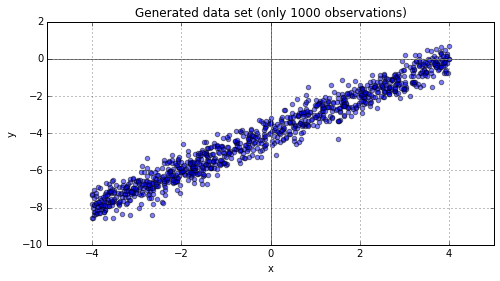

In [ ]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

# Create LinearRegression.csv

size = 1000000
x = np.random.uniform(-4, 4, size)
y = x * 1.0 - 4 + np.random.normal(0, 0.5, size)
weight = abs(1/x)
data = zip(y, x, weight)
np.savetxt('LinearRegression.csv', data, delimiter = ",")

# Confirm that we created a file of the right size

!wc -l LinearRegression.csv

# Plot the first 1000 points

def plot_points():
    plt.figure(figsize=(8,4))
    plt.grid(True)
    plt.axhline(0, color='grey')
    plt.axvline(0, color='grey')
    plt.scatter(x[:1000], y[:1000], marker='o', alpha=0.5)
    plt.title('Generated data set (only 1000 observations)')
    plt.xlabel('x')
    plt.ylabel('y')

plot_points()

## Create HW6.5 job

> Write a MapReduce job in MRJob to do the training at scale of a weighted OLS model using gradient descent.

In [ ]:
import csv
import sys

from mrjob.job import MRJob
from mrjob.protocol import RawProtocol

class WeightedOrdinaryLeastSquaresJob(MRJob):

    """
    Load the learning factor.
    """
    def configure_options(self):
        super(WeightedOrdinaryLeastSquaresJob, self).configure_options()

        self.add_passthrough_option(
            '--learning-factor', type = 'float', default = 0.001)

    """
    Load the regression model from the previous iteration and initialize the
    partial sums.
    """
    def mapper_init(self):
        self.load_model()
        self.gradient = [0.0] * len(self.coef)

    """
    Compute the error term and use the weighted error value to update the tally.
    """
    def mapper(self, _, line):
        row = csv.reader([line]).next()

        # First element is y, all middle elements are part of the vector x_i,
        # and the last element is the weight.

        y = float(row[0])
        x_i = [1.0] + [float(x) for x in row[1:-1]]
        weight = float(row[-1])

        # Compute the value predicted by the model by computing the dot product.
        # For now, avoid using numpy due to MRJob import issues.

        dot_product = sum([coef_j * x_ij for coef_j, x_ij in zip(self.coef, x_i)])
        error = dot_product - y

        # Update the gradient tally.

        for j in range(len(self.gradient)):
            self.gradient[j] += weight * error * x_i[j]

    """
    Yield the computed tally.
    """
    def mapper_final(self):
        for j in range(len(self.gradient)):
            yield j, self.gradient[j]

    """
    Load the regression model from the previous iteration.
    """
    def reducer_init(self):
        self.load_model()

    """
    Yield the new coefficients by subtracting the gradient change from the
    original coefficient.
    """
    def reducer(self, j, gradients):
        total_gradient = sum(gradients)
        adjusted_gradient = self.options.learning_factor * total_gradient

        new_coef = self.coef[j] - adjusted_gradient
        yield j, new_coef

    """
    Load the regression model from the previous iteration.
    """
    def load_model(self):

        # The model is not guaranteed to be in order since it can be emitted
        # by multiple reducers, so pad the array if we get an index that is
        # too far into the array.

        self.coef = []

        with open('model.txt', 'r') as model_file:
            for key, value in csv.reader(model_file):
                index = int(key)

                for i in range(len(self.coef), index + 1):
                    self.coef.append(0.0)

                self.coef[index] = float(value)

if __name__ == '__main__' and sys.argv[0].find('ipykernel') == -1:
    WeightedOrdinaryLeastSquaresJob().run()

## Create a generic driver

In [ ]:
import numpy
import os
import shutil
import time

class ConvergingModelDriver:

    """
    Stores the given model to a file.
    """
    def store_model(self, file_name, model):
        with open(file_name, 'w') as model_file:
            for key, point in model.iteritems():
                print >> model_file, str(key) + ',' + ','.join([str(x) for x in point])

    """
    Iterates until the threshold for convergence has been satisfied.
    """
    def run(self, runner_type, input_file, output_folder, threshold):

        # Create the output directory locally.

        if os.path.isdir(output_folder):
            shutil.rmtree(output_folder)

        os.mkdir(output_folder)

        # Initialize the model.

        pre_model = None
        post_model = self.get_initial_model()

        # Iterate until we have converged.

        converged = False
        iteration = 0

        self.log_iteration(0, post_model, None)

        time_start = time.time()
        base_args = ['-r', runner_type, '--strict-protocols', '--file=model.txt', input_file]

        while not converged:
            iteration += 1
            pre_model = post_model

            # Write the model.txt file for the next iteration.

            iteration_file_name = '%s/%04d.txt' % (output_folder, iteration)

            self.store_model(iteration_file_name, post_model)
            shutil.copyfile(iteration_file_name, 'model.txt')

            # Run the next iteration.

            iteration_output_folder = '%s/%04d' % (output_folder, iteration)

            iteration_args = ['--output-dir=' + iteration_output_folder]

            mr_job = self.get_job(base_args + iteration_args)

            with mr_job.make_runner() as runner:
                runner.run()

                # Retrieve the model from the streaming output.

                post_model = {}

                for line in runner.stream_output():
                    key, point = mr_job.parse_output_line(line)

                    if isinstance(point, float):
                        point = [point]

                    post_model[key] = point

                # Account for when some class no longer gets emitted

                for key, point in pre_model.iteritems():
                    if key not in post_model:
                        post_model[key] = point

            # Log iteration results and check for convergence.

            maximum_change = self.get_maximum_change(pre_model, post_model)
            self.log_iteration(iteration, post_model, maximum_change)
            converged = maximum_change <= threshold

        time_end = time.time()
        duration = time_end - time_start

        print 'Converged in', iteration, 'iteration(s), which required', duration, 'second(s)'

    """
    Returns the maximum change for any feature in the model.
    """
    def get_maximum_change(self, pre_model, post_model):
        best_point_difference = 0

        for key, pre_point in pre_model.iteritems():
            post_point = post_model[key]

            point_difference = numpy.array(pre_point) - numpy.array(post_point)
            max_point_difference = max(numpy.abs(point_difference))

            if max_point_difference > best_point_difference:
                best_point_difference = max_point_difference

        return best_point_difference

## Create HW6.5 driver

In [ ]:
import sys
import numpy

from ConvergingModelDriver import ConvergingModelDriver
from WeightedOrdinaryLeastSquaresJob import WeightedOrdinaryLeastSquaresJob

class WeightedOrdinaryLeastSquaresDriver(ConvergingModelDriver):

    """
    For reproducibility, we'll start at (0,0)
    """
    def get_initial_model(self):
        print '{:10s}{:>10s}{:>10s}'.format('Iteration', 'Intercept', 'Slope')
        print '-------------------------------'

        return {
            0: [0.0],
            1: [0.0]
        }

    """
    Return a job with a maximum weight set to 1000 and a learning rate set
    to 2 * 10^-7
    """
    def get_job(self, iteration_args):
        learning_factor = 1.0 / (1000.0 * 1000.0 * 20)

        extra_args = [
            '--learning-factor=' + str(learning_factor)
        ]

        jobs_args = iteration_args + extra_args
        return WeightedOrdinaryLeastSquaresJob(args = jobs_args)

    """
    Logs the model.
    """
    def log_iteration(self, iteration, model, maximum_change):
        print '{:<10d}{:>10.4f}{:>10.4f}'.format(iteration, model[0][0], model[1][0])

if __name__ == '__main__' and sys.argv[0].find('ipykernel') == -1:
    driver = WeightedOrdinaryLeastSquaresDriver()
    driver.run(sys.argv[1], sys.argv[2], sys.argv[3], float(sys.argv[4]))

## Run HW6.5 job

In [ ]:
!python WeightedOrdinaryLeastSquaresDriver.py local LinearRegression.csv mrjob_65_output 0.001 2> /dev/null

Iteration  Intercept     Slope
-------------------------------
0             0.0000    0.0000
1            -0.7046    0.0998
2            -1.2850    0.1897
3            -1.7629    0.2706
4            -2.1566    0.3435
5            -2.4809    0.4090
6            -2.7479    0.4680
7            -2.9679    0.5211
8            -3.1490    0.5690
9            -3.2982    0.6120
10           -3.4211    0.6507
11           -3.5224    0.6856
12           -3.6057    0.7170
13           -3.6744    0.7452
14           -3.7309    0.7707
15           -3.7775    0.7936
16           -3.8159    0.8142
17           -3.8475    0.8327
18           -3.8735    0.8494
19           -3.8949    0.8644
20           -3.9126    0.8779
21           -3.9271    0.8901
22           -3.9391    0.9011
23           -3.9490    0.9109
24           -3.9571    0.9198
25           -3.9638    0.9278
26           -3.9693    0.9350
27           -3.9739    0.9415
28           -3.9776    0.9473
29           -3.9807    0.9525
30     

# HW 6.5a

> Sample 1% of the data in MapReduce.

## Create a job to sample data

In [ ]:
import random
import sys

from mrjob.job import MRJob
from mrjob.protocol import RawValueProtocol

class RandomSampleJob(MRJob):

    OUTPUT_PROTOCOL = RawValueProtocol

    """
    Load the sampling factor.
    """
    def configure_options(self):
        super(RandomSampleJob, self).configure_options()

        self.add_passthrough_option(
            '--sampling-factor', type = 'float', default = 0.01)

    """
    Yield the line with the sampling probability.
    """
    def mapper(self, _, line):
        if random.random() <= self.options.sampling_factor:
            yield None, line

if __name__ == '__main__' and sys.argv[0].find('ipykernel') == -1:
    RandomSampleJob().run()

## Run the sampling job

In [ ]:
!rm -rf mrjob_65a_output
!python RandomSampleJob.py -r local \
    --strict-protocols \
    --sampling-factor=0.01 \
    --output-dir=mrjob_65a_output \
    LinearRegression.csv \
    --no-output \
    > /dev/null 2>&1

In [ ]:
!cat mrjob_65a_output/* > LinearRegression.sample.csv
!wc -l LinearRegression.sample.csv

10085 LinearRegression.sample.csv


## Check HW6.5 against scikit-learn

> Use the sampled dataset to train a (weighted if available in SciKit-Learn) linear regression model locally using  SciKit-Learn (http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

In [ ]:
import numpy
import pandas
from sklearn.linear_model import LinearRegression

# Load the model using numpy

y_sample, x_sample, weight_sample = numpy.loadtxt('LinearRegression.sample.csv', delimiter = ',').T

lr = LinearRegression()
lr.fit(x_sample.reshape(-1, 1), y_sample, weight_sample)

mrjob = WeightedOrdinaryLeastSquaresJob()
mrjob.load_model()

true_coefs = [-4.0, 1.0]
lr_coefs = [lr.intercept_, lr.coef_[0]]
mrjob_coefs = mrjob.coef

pandas.DataFrame(
    [true_coefs, lr_coefs, mrjob_coefs],
    index = ['True Function', 'SKLearn Estimate', 'MRJob Estimate'],
    columns = ['Intercept', 'Slope'])

,Intercept,Slope
True Function,-4.000000,1.000000
SKLearn Estimate,-3.853216,0.998902
MRJob Estimate,-3.994272,0.990018


## Plot 6.5 model

> Plot the resulting weighted linear regression model versus the original model that you used to generate the data.

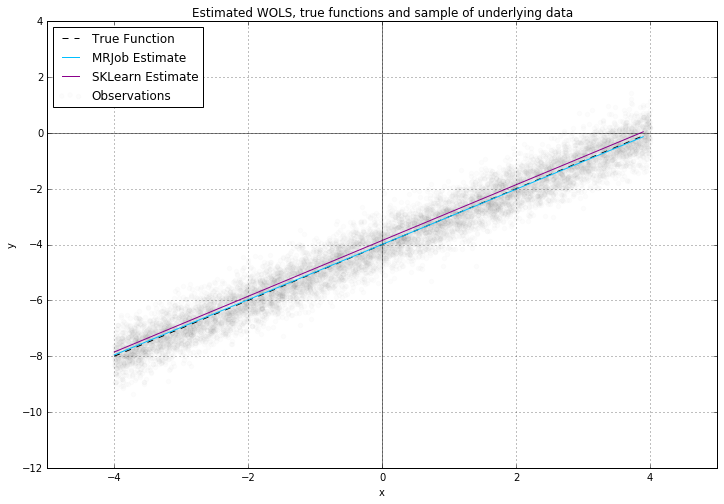

In [ ]:
def plot_65():
    xStep = np.arange(-4, 4, 0.1)
    y_True = -4 + xStep
    y_MRJob = mrjob_coefs[0] + mrjob_coefs[1] * xStep
    y_SKLearn = lr_coefs[0] + lr_coefs[1] * xStep

    plt.figure(figsize=(12,8))
    plt.grid(True)
    plt.axhline(0, color='grey')
    plt.axvline(0, color='grey')
    plt.scatter(x_sample, y_sample, marker='o', color='grey', alpha=0.02, label='Observations')
    trueFunction = plt.plot(xStep, y_True, color='black', ls='dashed', label='True Function')
    MRJobFunction = plt.plot(xStep, y_MRJob, color='deepskyblue', label='MRJob Estimate')
    SKLearnFunction = plt.plot(xStep, y_SKLearn, color='darkmagenta', label='SKLearn Estimate')
    plt.title('Estimated WOLS, true functions and sample of underlying data')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend(loc='upper left')

plot_65()

> Comment on your findings.

Visually, all the estimates are very similar to each other (the lines are barely distinguishable). We see more of a difference when we look at the table of values where `scikit-learn` has a better estimate of the slope while the MapReduce implementation has a better estimate of the intercept term.

# HW 6.5.1 (Optional)

> Using MRJob and in Python, plot the error surface for the weighted linear regression model using a heatmap and contour plot. Also plot the current model in the original domain space.  (Plot them side by side if possible)

> Plot the path to convergence (during training) for the weighted linear regression model in plot error space and in the original domain space. Make sure to label your plots with iteration numbers, function, model space versus original domain space, etc.

> Comment on convergence and on the mean squared error using your weighted OLS algorithm on the weighted dataset versus using the weighted OLS algorithm on the uniformly weighted dataset.

# HW 6.6 Clean up notebook for GMM via EM

> Using the following notebook as a starting point:

> http://nbviewer.jupyter.org/urls/dl.dropbox.com/s/0t7985e40fovlkw/EM-GMM-MapReduce%20Design%201.ipynb

> Improve this notebook as follows:
> - Add in equations into the notebook (not images of equations)
> - Number the equations
> - Make sure the equation notation matches the code and the code and comments refer to the equations numbers
> - Comment the code
> - Rename/Reorganize the code to make it more readable
> - Rerun the examples similar graphics (or possibly better graphics)

Standalone notebook located here: [MIDS-W261-2016-HWK-Week06-Seltzer_GMMviaEM.ipynb](http://nbviewer.jupyter.org/github/mseltz/W261-Fall2016/blob/master/Week06/MIDS-W261-2016-HWK-Week06-Seltzer_GMMviaEM.ipynb)

# HW 6.7 Implement Bernoulli Mixture Model via EM

> Implement the EM clustering algorithm to determine Bernoulli Mixture Model for discrete data in MRJob.

# HW 6.7a Unit Test

> As a unit test use the dataset in the following slides:

> https://www.dropbox.com/s/maoj9jidxj1xf5l/MIDS-Live-Lecture-06-EM-Bernouilli-MM-Systems-Test.pdf?dl=0

> Cross-check that you get the same cluster assignments and cluster Bernouilli models as presented in the slides after 25 iterations. Don't forget the smoothing.

# HW 6.7b Tweet Dataset

> As a test: use the same dataset from HW 4.5, the Tweet Dataset.
Using this data, you will implement a 1000-dimensional EM-based Bernoulli Mixture Model  algorithm in MrJob on the users by their 1000-dimensional word stripes/vectors using K = 4.

# HW 6.7c Check vs. K-Means

> Repeat this experiment using your KMeans MRJob implementation fron HW4.

> Report the rand index score using the class code as ground truth label for both algorithms and comment on your findings.